# Predicting Newsletter Subscription Using Age and Hours Played

## Introduction

A UBC Computer Science research group led by Frank Wood is collecting user and system information from the PLAIcraft server. This research group's overarching goal is to push the boundaries of artificial intelligence through innovative work in generative modelling, reinforcement learning, probabilistic programming, and Bayesian inference (PLAI, 2024). With PLAICraft, they aim to collect data from players on Minecraft gameplay to train NPC agents to play and respond to video and audio perceptual environments like real players (Smith, 2025). Our group project will help contribute to their goal by examining the possible correlation between age characteristics and playtime behaviours to subscription status, to find ways to encourage players to subscribe to the newspaper through the help of the trained NPC agents.

### Question
<p>We will be addressing question 1:</p><p><em>What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?</em></p>

To explore this, our question is:
<strong>Can age and hours played predict if a player will subscribe to a game newsletter?</strong></em><p>

This question will be answered using the `players.csv` dataset. The dataset contains information about the players, which includes personal details such as their name, email, gender and age, alongside their experience levels, hours played and whether they are subscribed to the newsletter or not.


`players.csv`consists of user data with 196 observations and 7 variables:

|<strong>Variable         | Data Type | Variable Definition</strong>                       |
|:------------------------|:----------|:---------------------------------------------------|
| `experience`            | chr       | Player's experience level                          |
| `subscribe`             | lgl       | If player has subscribed to the game newsletter    |
| `hashedEmail`           | chr       | Player's unique hashed email                       |
| `played_hours`          | dbl       | Hours  player has played on the PLAICraft server   |
| `name`                  | chr       | Player's name                                      |
| `gender`                | chr       | Player's gender                                    |
| `Age`                   | dbl       | Player's age                                       |

The purpose of this project will be to address whether age characteristics and playtime hours can effectively predict the newsletter subscription status of a player, using the ages and playtime hours of subscribing and non-subscribing player types in the dataset. 



## Methods & Results

##### First, we will set a seed to ensure our data analysis is reproducible. We will also import all necessary libraries. 

In [1]:
set.seed(2222)

# Run cell to import all libraries
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Loading and Wrangling the Dataset
As we are only working with `subscribe`, `Age` and `played_hours` in this analysis, we will only select these variables in our data wrangling. We will also filter out the two age values that are NA. 

In [2]:
# Loading in the data
players_raw <- read_csv("https://raw.githubusercontent.com/echen504/dsci-100-25w2-grp29/refs/heads/main/players.csv")

# Wrangling the dataset that will be used in this project
players <- players_raw |>
    select(subscribe, played_hours, Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscriber" = "TRUE", "Non-Subscriber" = "FALSE")) |>
    filter(!is.na(Age))
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subscribe      played_hours Age
1 Subscriber     30.3          9 
2 Subscriber      3.8         17 
3 Non-Subscriber  0.0         17 
4 Subscriber      0.7         21 
5 Subscriber      0.1         21 
6 Subscriber      0.0         17

#### Summary Statistics of the Dataset

In [3]:
# Counting the proportion of Subscriber vs. Non-Subscriber
subs_count <- players |>
  group_by(subscribe) |>
  summarize(count = n())
subs_count

# Summary Statistics
players_max <- players |>
    select(played_hours, Age) |>
    map_df(max, na.rm = TRUE)

players_min <- players |>
    select(played_hours, Age) |>
    map_df(min, na.rm = TRUE)

players_avg <- players |>
    select(played_hours, Age) |>
    map_df(mean, na.rm = TRUE)

players_median <- players |>
    select(played_hours, Age) |>
    map_df(median, na.rm = TRUE)

subscribe      count
1 Non-Subscriber  52  
2 Subscriber     142

|Summary Statistic| Hours Played | Age    |
|:---------------:|:------------:|:------:|
|Max              |223.1         |50      |
|Min              |0             |8       |
|Mean             |5.845918      |20.52062|
|Median           |0.1           |19      |

#### Visualizing the Exploratory Data

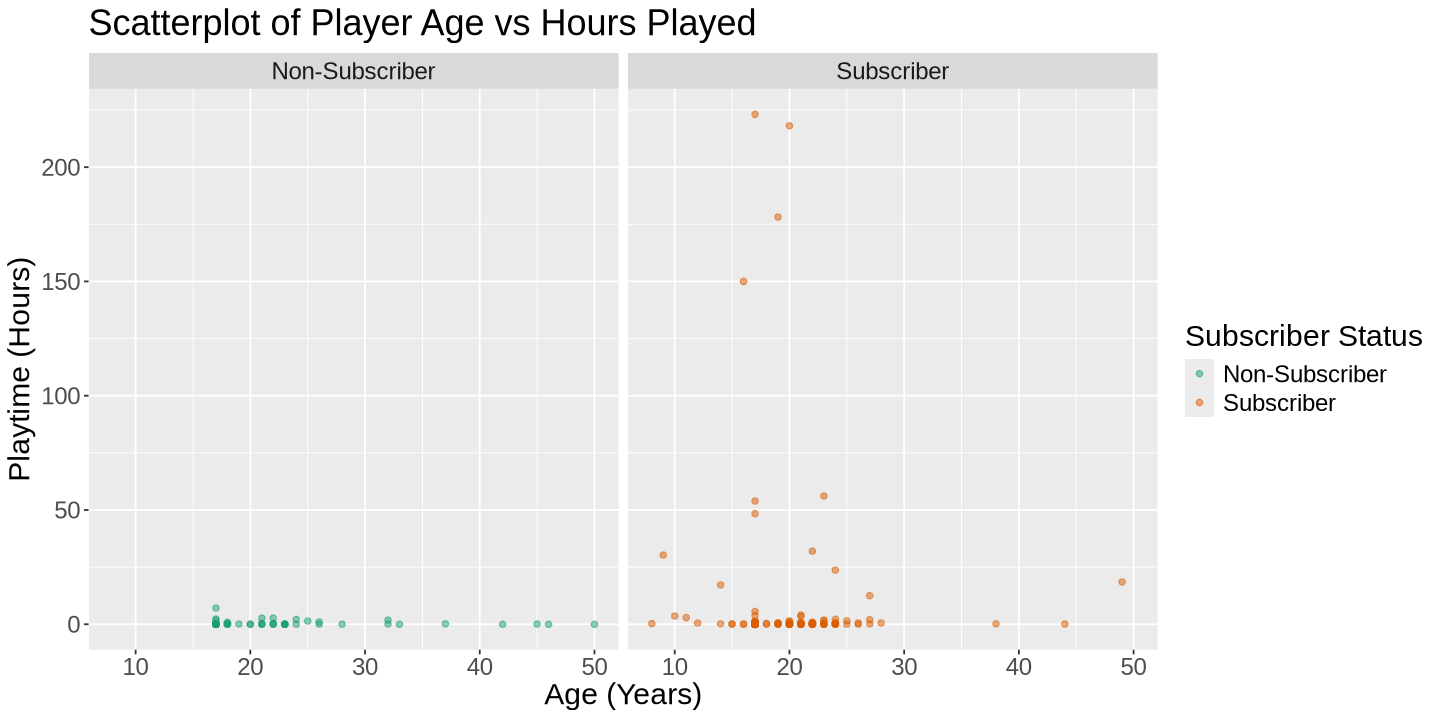

In [4]:
options(repr.plot.height = 6, repr.plot.width = 12)

# Visualizing player age vs. hours played in a scatterplot
players_plot <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (Years)",
         y = "Playtime (Hours)",
         title = "Scatterplot of Player Age vs Hours Played",
         color = "Subscriber Status") +
    theme(text = element_text(size = 18)) +
    scale_color_brewer(palette = "Dark2") +
    facet_grid(cols = vars(subscribe))
players_plot

<strong>Figure 1:</strong> Scatterplot of player age vs hours played, separated by subscriber class due to overcrowding. 

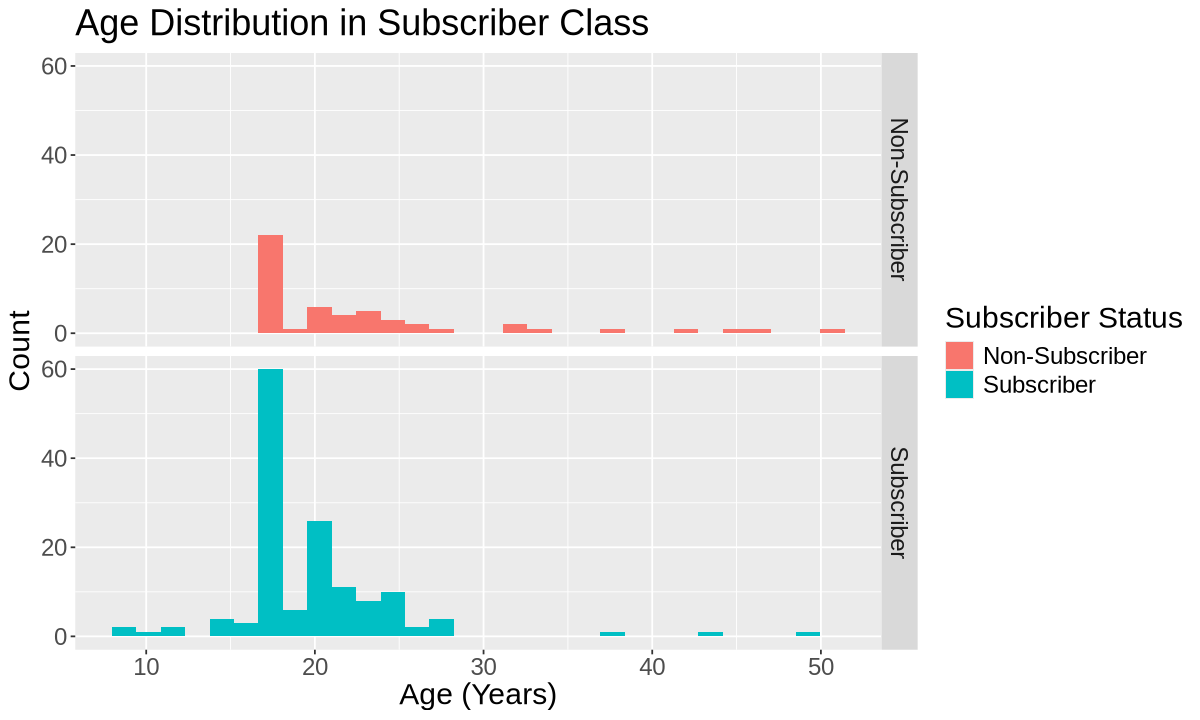

In [5]:
options(repr.plot.height = 6, repr.plot.width = 10)

# Visualizing the distribution of Subscriber vs. Non-subscriber ages
age_histogram <- players |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(bins = 30) +
    labs(x = "Age (Years)",
         y = "Count",
         title = "Age Distribution in Subscriber Class",
         fill = "Subscriber Status") +
    theme(text = element_text(size = 18)) +
    facet_grid(rows = vars(subscribe))
age_histogram

<strong>Figure 2:</strong> Distribution of players ages, separated by subscriber class. 

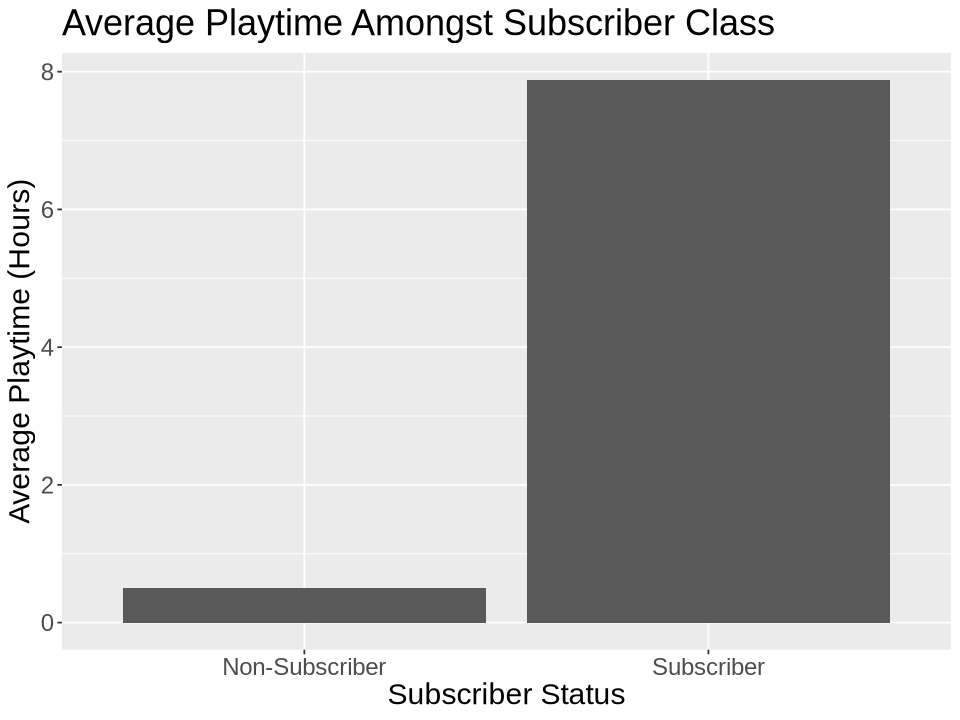

In [6]:
options(repr.plot.height = 6, repr.plot.width = 8)

# Visualizing the average playtime between Subscriber vs. Non-Subscriber
avg_playtime <- players |>
    group_by(subscribe) |>
    summarize(avg_time = mean(played_hours))

playtime_plot <- avg_playtime |>
    ggplot(aes(x = subscribe, y = avg_time)) +
    geom_bar(stat = "identity") +
    labs(x = "Subscriber Status",
         y = "Average Playtime (Hours)",
         title = "Average Playtime Amongst Subscriber Class",
         fill = "Subscriber Status") +
    theme(text = element_text(size = 18))
playtime_plot

<strong>Figure 3:</strong> The average played hours in Subscribers vs. Non-subscribers. 

### Data Analysis

We will be using a <strong>K-nearest neighbours classification</strong> to predict the `subscribe` class using predictor variables `Age` and `played_hours`.

#### Creating the K-NN Classification Model

##### We first let R randomly split the data into a 75% training and 25% testing set.

In [7]:
# Splitting the data
players_split <- initial_split(players, prop = 0.75, strata = subscribe)
players_training <- training(players_split) 
players_testing <- testing(players_split)

head(players_training)
head(players_testing)

# Counting the number of observations in each split
training_count <- players_training |>
  summarize(count = n())
training_count

training_count <- players_testing |>
  summarize(count = n())
training_count

subscribe      played_hours Age
1 Non-Subscriber 0.0          17 
2 Non-Subscriber 0.1          17 
3 Non-Subscriber 0.1          18 
4 Non-Subscriber 1.4          25 
5 Non-Subscriber 0.0          23 
6 Non-Subscriber 0.9          18

subscribe      played_hours Age
1 Non-Subscriber 0.0          21 
2 Subscriber     0.1          17 
3 Subscriber     0.0          22 
4 Subscriber     1.6          23 
5 Subscriber     1.5          25 
6 Non-Subscriber 0.0          22

count
1 145

count
1 49

##### Now, we will pre-process and standardize the training set data using the recipe function.
In the standardized recipe, we will specify that:
- `subscribe` is the response variable 
- `Age` and `played_hours` are the predictors
##### We will also build our K-Nearest Neighbours Classification model and tune it.

In [8]:
# Creating our recipe and standardizing the data
players_recipe <- recipe(subscribe ~ ., data = players_training) |>
    step_normalize(all_predictors()) 

# Tuning our K-NN classification model
data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

##### Next, we will perform a 5-fold cross-validation on the training set to choose the K-value with the best accuracy estimate. 
To do this, we will: 
1. Split the training set into 5 folds using vfold_cv
2. Create a tibble object with a sequence of possible K-values from 1 to 20 (stepping by 2)
3. Fit the K-NN model and recipe into a workflow
<ol>
  <li> Use tune_grid to fit the model using each possible K-value in the sequence created in step 2 </li>
  <li> Utilize collect_metrics to compute the mean and standard error of the classifier's validation accuracy across all folds
    </ol>
4. Filtering the accuracy estimates of all K-values

In [9]:
# Splitting the training set data into 5 folds
data_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

# Creating a sequence of potential K-values
knn_grid <- tibble(neighbors = seq(from = 1, to = 30, by = 2))

# Fitting the K-NN model and recipe into the workflow
data_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(data_spec) |>
    tune_grid(resamples = data_vfold, grid = knn_grid)|> 
    collect_metrics() 
head(data_fit)

# Filtering all accuracy estimates of K
accuracies <- data_fit |>
    filter(.metric == "accuracy")
head(accuracies)

neighbors .metric  .estimator mean      n std_err    .config              
1 1         accuracy binary     0.5089327 5 0.04338282 Preprocessor1_Model01
2 1         roc_auc  binary     0.5561147 5 0.05856254 Preprocessor1_Model01
3 3         accuracy binary     0.5174713 5 0.01617548 Preprocessor1_Model02
4 3         roc_auc  binary     0.5168097 5 0.03004271 Preprocessor1_Model02
5 5         accuracy binary     0.5379310 5 0.04130741 Preprocessor1_Model03
6 5         roc_auc  binary     0.5576067 5 0.03516777 Preprocessor1_Model03

neighbors .metric  .estimator mean      n std_err    .config              
1  1        accuracy binary     0.5089327 5 0.04338282 Preprocessor1_Model01
2  3        accuracy binary     0.5174713 5 0.01617548 Preprocessor1_Model02
3  5        accuracy binary     0.5379310 5 0.04130741 Preprocessor1_Model03
4  7        accuracy binary     0.5726601 5 0.02845867 Preprocessor1_Model04
5  9        accuracy binary     0.6195567 5 0.04712754 Preprocessor1_Model05
6 11        accuracy binary     0.6335796 5 0.03789325 Preprocessor1_Model06

##### We will now decide on the best K-value by plotting Accuracy Estimate vs. Neighbors. 
The K-value from 1 to 30 with the highest accuracy estimation will be selected.

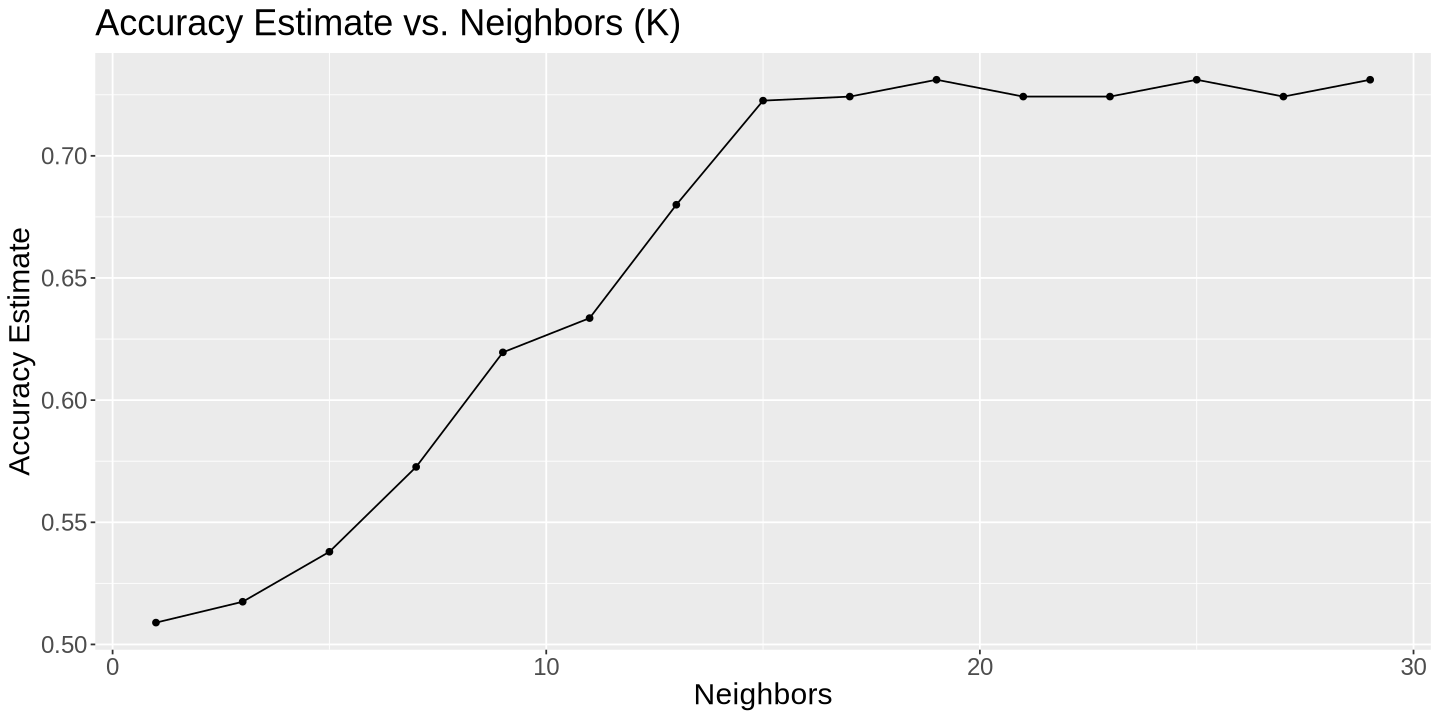

In [10]:
options(repr.plot.height = 6, repr.plot.width = 12)

# Accuracy Estimate vs. Neighbours (K-value) Visualization
cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate",
        title = "Accuracy Estimate vs. Neighbors (K)") +
    theme(text = element_text(size = 18))
cross_val_plot

<strong> Figure 4:</strong> Accuracy vs. K plot to select the best K-value with the highest accuracy estimate

In [11]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 19

##### From Figure 4 and `best_k` analysis above, we have concluded that <strong> K = 19 </strong> is the best K-value to use in the K-NN model. 

We will now build our K-NN Classification model and fit it into the workflow using the best K-value.

In [12]:
# Creating a K-NN model using K = 17
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>
    set_mode("classification")

# Fitting the new model into the workflow
players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)
players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2482759
Best kernel: rectangular
Best k: 19

#### Testing the K-NN Classification Model
##### Now we will use the K-NN Classification model we created above to predict the `subscribe` class using the testing set. 

In [13]:
# Predicting subscribe class on the testing set
players_predictions <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)
head(players_predictions)

.pred_class subscribe      played_hours Age
1 Subscriber  Non-Subscriber 0.0          21 
2 Subscriber  Subscriber     0.1          17 
3 Subscriber  Subscriber     0.0          22 
4 Subscriber  Subscriber     1.6          23 
5 Subscriber  Subscriber     1.5          25 
6 Subscriber  Non-Subscriber 0.0          22

##### The K-NN model we created will be evaluated by:
- Finding the confusion matrix
 <ol>
  <li> <strong>Subscriber</strong> is the positive class</li>
  <li> <strong>Non-Subscriber</strong> is the negative class
    </ol>
- Computing the accuracy, precision and recall of the model

In [14]:
players_predictions <- players_predictions |>
    mutate(.pred_class = factor(.pred_class, levels = c("Subscriber", "Non-Subscriber")),
           subscribe = factor(subscribe, levels = c("Subscriber", "Non-Subscriber")))

# Computing the confusion matrix of the model
players_conf_mat <- players_predictions |>
    conf_mat(truth = subscribe , estimate = .pred_class)
players_conf_mat

# Computing accuracy
player_accuracy <- players_predictions |>
    accuracy(truth = subscribe, estimate = .pred_class, event_levels = "first")

# Computing precision
player_precision <- players_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_levels = "first")

# Computing recall
player_recall <- players_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_levels = "first")

# Combining accuracy, precision and recall into a tibble
player_metrics <- tibble(accuracy = player_accuracy |> select(.estimate) |> pull(),
                         recall = player_recall |> select(.estimate) |> pull(),
                         precision = player_precision |> select(.estimate) |> pull())
player_metrics

                Truth
Prediction       Subscriber Non-Subscriber
  Subscriber             35             13
  Non-Subscriber          1              0

accuracy  recall    precision
1 0.7142857 0.9722222 0.7291667

#### Visualization of the Analysis

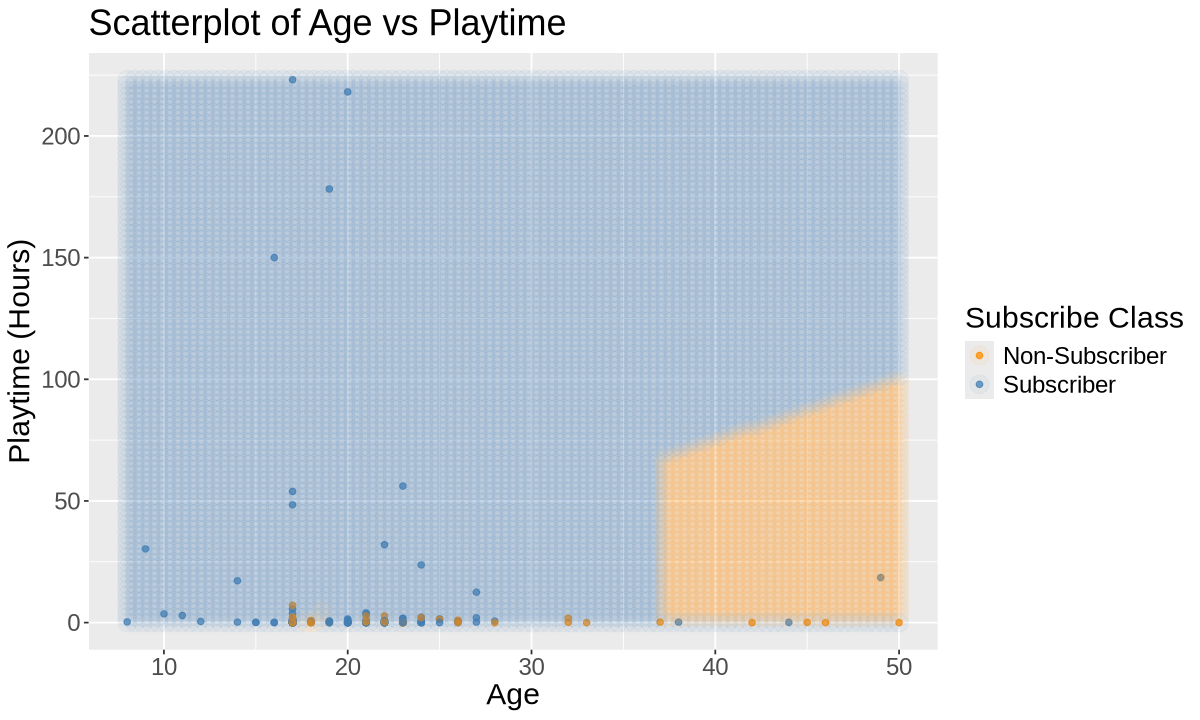

In [15]:
# Create the grid of the predictor variables, and arrange in a data frame
are_grid <- seq(min(players$Age),
                max(players$Age),
                length.out = 100)

smo_grid <- seq(min(players$played_hours),
                max(players$played_hours),
                length.out = 100)

asgrid <- as_tibble(expand.grid(Age = are_grid,
                                played_hours = smo_grid))

# Use the fitted workflow to make predictions using the grid points
knnPredGrid <- predict(players_fit, asgrid)

# Bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(subscribe = .pred_class)

options(repr.plot.height = 6, repr.plot.width = 10)

# Creating the analysis visualization
analysis_plot <- ggplot() +
  geom_point(data = players,
             mapping = aes(x = Age,
                           y = played_hours,
                           color = subscribe),
             alpha = 0.75) +
  geom_point(data = prediction_table,
             mapping = aes(x = Age,
                           y = played_hours,
                           color = subscribe),
             alpha = 0.05,
             size = 5) +
  labs(color = "Subscribe Class",
       x = "Age",
       y = "Playtime (Hours)") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
    ggtitle("Scatterplot of Age vs Playtime") +
  theme(text = element_text(size = 18))
analysis_plot

<strong> Figure 5: </strong> Scatter plot of Age vs. Playtime, where background colour indicates the classifier's prediction.

## Discussion

#### Confusion Matrix
Looking at the confusion matrix, we can see that the “Non-Subscriber” class was predicted correctly 0 times, and false positives where non-subscribers were predicted to be subscribers occurred 13 times. Most predictions (36/49) predict  “Subscriber”, implying a strong bias towards this class. 

#### Evaluation Metrics
<p>Our model’s <strong>accuracy</strong> is 71.43%. However, the number of correct predictions made by our model is skewed by the dataset’s class imbalance, making it higher than normal. The overrepresentation of the “Subscriber” class makes our accuracy of 71.43% misleading, as this metric is a ratio of correct predictions over total predictions.</p> 
<p>Similarly, our value for <strong>recall</strong> (97.22%) is very inflated as this metric only takes into account the number of positive predictions, not negative. The “Non-Subscriber” was incorrectly classified 100% of the time in our testing set, so accuracy and recall are poor evaluation markers of our model’s performance.</p>
<strong>Precision</strong> gives the most appropriate evaluation of our model by taking into account the number of false positives. It reflects the model’s ability to distinguish between classes most effectively,  which is reflected in a lower score of 72.91%. 

### Summary and Findings
Given the poor prediction performance of our classification model, we can conclude that `Age` and `played_hours` cannot effectively predict the `subscribe` status of a PLAIcraft player. This conclusion is evident in our evaluation of the model using the confusion matrix, evaluation metrics, and our analysis visualization in Figure 5. By looking at our low accuracy (71.43%) and precision (72.91%) values, we can see that our K-NN Classification model makes the wrong prediction quite frequently. Furthermore, Figure 5 emphasizes the incompetence of our model by showing no relationship between the predicted subscriber class (background) and the true subscriber classification (points). In addition, the confusion matrix indicates that “Non-Subscriber” was never accurately predicted.

As a large proportion of the observations were incorrectly classified, it is clear that there was no correlation between the predictor and response variables in the dataset and that our model did not work well. This is not the outcome we expected, as we hypothesized that there would be some correlation between the three variables. 

##### These findings are likely due to limitations such as: 
- Class imbalance favours the majority class (Subscriber)
- Outliers in the subscriber class 
- Large K-value in comparison to the sample size.

These results may allow researchers to rule out the combination of `Age` and `played_hours` as factors that affect a player’s decision to subscribe to the newsletter, but we can't be certain unless we properly address these limitations. The impact of these limitations on the success of our K-NN Classification model is discussed below in Limitations. 

### Impact of Findings and Future Questions

<p> The poor performance of our K-NN classification model brings up the question: </p>
<p></p><strong>Is there truly no relationship between age, hours played, and subscriber status, or does the class imbalance hide a potentially existing relationship?</strong></p>


##### We can explore this in the future by asking:

- How can rebalancing the classes improve the performance of the model?
- Is there a model other than KNN classification that could capture the relationship better?

As our current findings suggest there is no correlation between `Age` and `played_hours` in the `subscribe` class, this conclusion can impact future studies and marketing strategies of newsletter subscriptions. For subsequent studies using the `players.csv` dataset, researchers can explore different variables to see if other player characteristics/behaviours correlate to subscription status. 

##### Potential questions may include:
- Can experience level and gender predict if a player will subscribe to the newsletter?
- Can gender and age predict if a player will subscribe to the newsletter?

Our results indicate that targeting specific age groups or a user's playtime hour habits is ineffective for newsletter subscriptions, so this could impact the trajectory of future marketing strategies. Rather than target age and playtime, our analysis would encourage researchers to explore other factors of a player's decision to subscribe. Further exploration of other variables can help researchers develop effective marketing strategies that target more effective variables that correlate to subscription status. 

## Limitations

#### Class Imbalance 
<p>The bias in our model is likely due to a class imbalance, as there are more observations for subscribers compared to non-subscribers (145 vs 52). Our model performs classification by using the mode amongst the K-nearest neighbours, so an imbalanced data set would cause the model to predict the majority class more often. We were unable to address this limitation in our data wrangling, as balancing data was outside the scope of this course. </p>

#### Outliers
<p> Looking at the scatter plots for Age vs Hours played, we can see that the range of hours played lies mostly between 0 to 70. However, there are a few outliers in the Subscriber class that visually lie above this range, upwards of 150 hours. Since our model relies on Euclidean distance calculations to determine the K-nearest neighbours, these outliers may distort the calculations, leading to incorrect classifications. </p>  

#### Sample Size
<p>Another possible limitation is the small sample size in comparison to the magnitude of K. The K-value we chose through cross-validation was 19, which is a relatively high value compared to the number of observations in the training and testing sets, which were 145 and 49, respectively. This may lead to underfitting, making the classification less sensitive to noise and subtle patterns that may lead to more accurate predictions. This is also amplified from the small sample size as there are less points overall, meaning that each prediction relies on a huge proportion of the dataset. This, coupled with class imbalance, leads to overgeneralization of the classifier and weakens the predictive accuracy of the model.  </p> 




## References 

<p>Pacific Laboratory for Artificial Intelligence (PLAI). Pacific Laboratory for Artificial 
    Intelligence. (2024, December 5). https://plai.cs.ubc.ca/</p> 
<p>Smith, A. (2025, January 21). Plaicraft.ai launch. Pacific Laboratory for Artificial 
    Intelligence. https://plai.cs.ubc.ca/2023/09/27/plaicraft/  </p> 
